# IBM DATA SCIENCE CAPSTONE PROJECT 

## Analysis of Bangalore City, India on neighborhood(venues,location...) Data to find the best locations to open a fitness centre using Foursquare APIs and K-Means Clustering method.

#### Importing all required libraries!

In [268]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis


import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't installed
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

import seaborn as sns

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't installed 
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Loading Bangalore Neighborhood Dataset from Kaggle

In [269]:
dfs = pd.read_html('https://github.com/inboxpraveen/Coursera_capstone/blob/master/data/complete_dataset.csv')
df = dfs[0]
df.head()

,Unnamed: 0,Unnamed: 1,Borough,Neighborhoods,Latitude,Longitude,Population,City,AverageIncome
0,NaN,0,Central,Cantonment area,12.972442,77.580643,866377,Bangalore,18944.099792
1,NaN,1,Central,Domlur,12.960992,77.638726,743186,Bangalore,56837.022198
2,NaN,2,Central,Indiranagar,12.971891,77.641151,474289,Bangalore,41991.817435
3,NaN,3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,Bangalore,6667.447632
4,NaN,4,Central,Malleswaram,13.003100,77.564300,893629,Bangalore,53270.063892


In [270]:
df.drop(columns = ['Unnamed: 0','Unnamed: 1','City'], inplace = True)
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,53270.063892


In [271]:
df['Borough'].nunique() #total no of boroughs

8

In [272]:
df['Borough'].unique() #list of boroughs

array(['Central', 'Eastern', 'NorthEastern', 'Northern', 'SouthEastern',
       'Southern', 'SouthernSuburbs', 'Western'], dtype=object)

#### Boroughs vs Number of Neighborhoods

In [273]:
df_1 = df[['Borough','Neighborhoods']]
df_grp1 = df_1.groupby(['Borough'], as_index = False).count() #arranging no of neighborhoods and boroughs
df_grp1

,Borough,Neighborhoods
0,Central,12
1,Eastern,8
2,NorthEastern,6
3,Northern,8
4,SouthEastern,7
5,Southern,8
6,SouthernSuburbs,6
7,Western,9


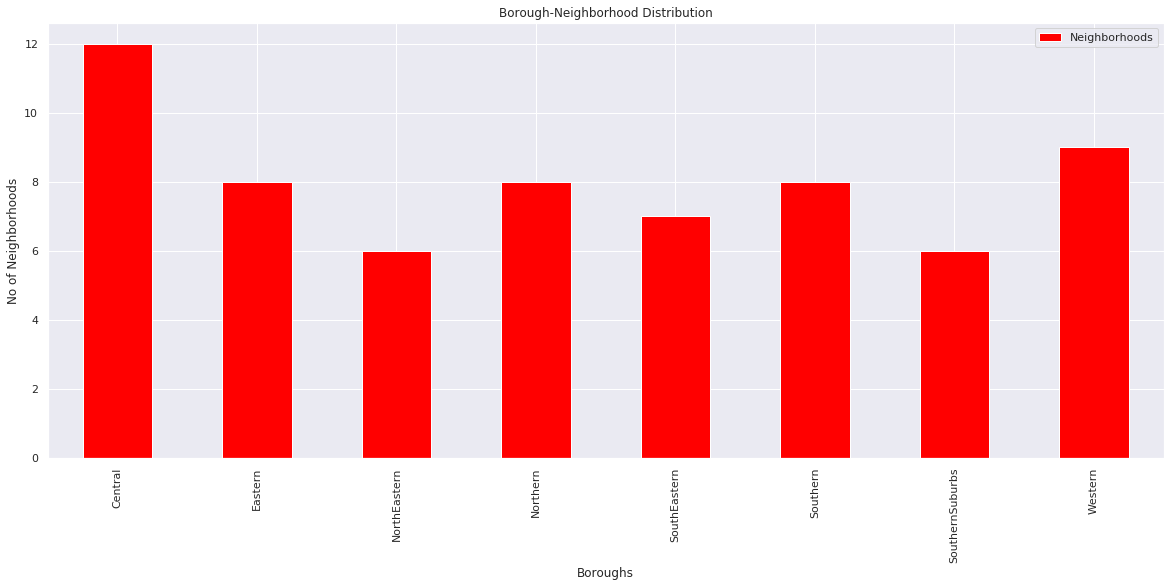

In [274]:
#plotting a graph
df_grp1.plot(kind = 'bar',figsize=(20, 8),color = 'red')
plt.ylabel('No of Neighborhoods')
plt.xlabel('Boroughs')
labels = df['Borough'].unique()
ticks = np.arange(0,8,1)
plt.xticks(ticks,labels)
plt.title('Borough-Neighborhood Distribution')
plt.show()


#### Neighbohoods vs Population

In [275]:
df_2 = df[['Neighborhoods','Population']]
df_grp2 = df_2.groupby(['Neighborhoods'], as_index = False).max()
df_grp2.head()

,Neighborhoods,Population
0,Anjanapura,940039
1,Arekere,138760
2,BTM Layout,835743
3,Banashankari,810407
4,Banaswadi,632031


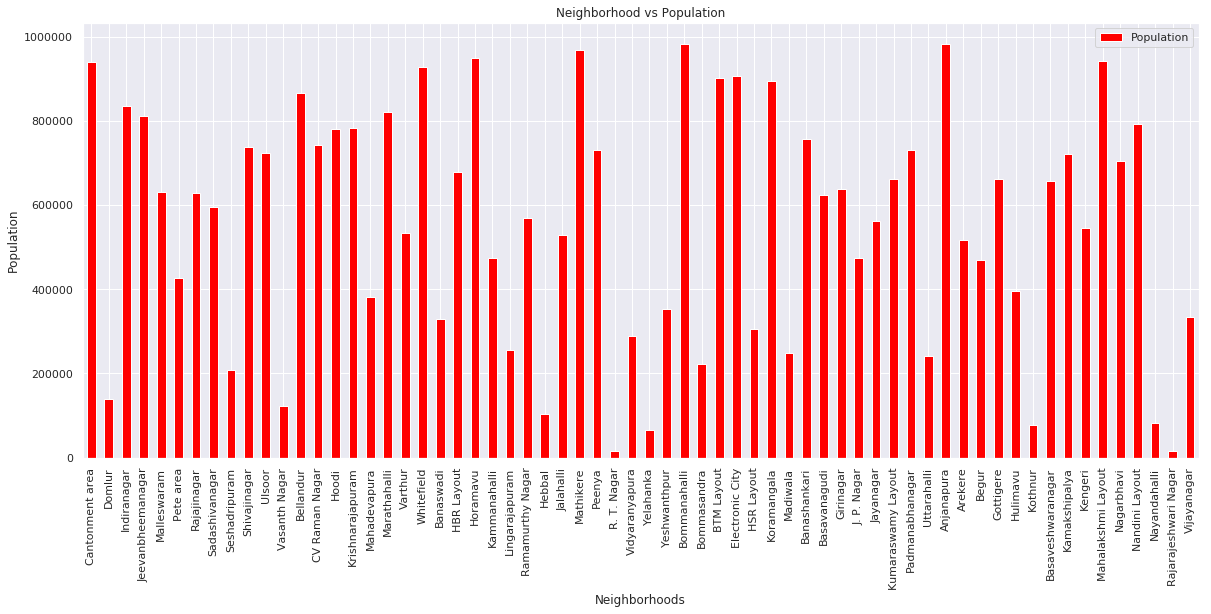

In [276]:
df_grp2.plot(kind = 'bar',stacked = False,color = 'red',figsize=(20, 8))
plt.ylabel('Population')
plt.xlabel('Neighborhoods')
labels = df['Neighborhoods'].unique()
ticks = np.arange(0,64,1)
plt.xticks(ticks,labels)
plt.title('Neighborhood vs Population')
plt.show()

#### Neighborhood vs Average Income 

In [277]:
df_3 = df[['Neighborhoods','AverageIncome']]
df_grp3 = df_3.groupby(['Neighborhoods'], as_index = False).max()
df_grp3.head()

,Neighborhoods,AverageIncome
0,Anjanapura,44218.922553
1,Arekere,29378.716626
2,BTM Layout,49310.618884
3,Banashankari,57524.209528
4,Banaswadi,53349.701184


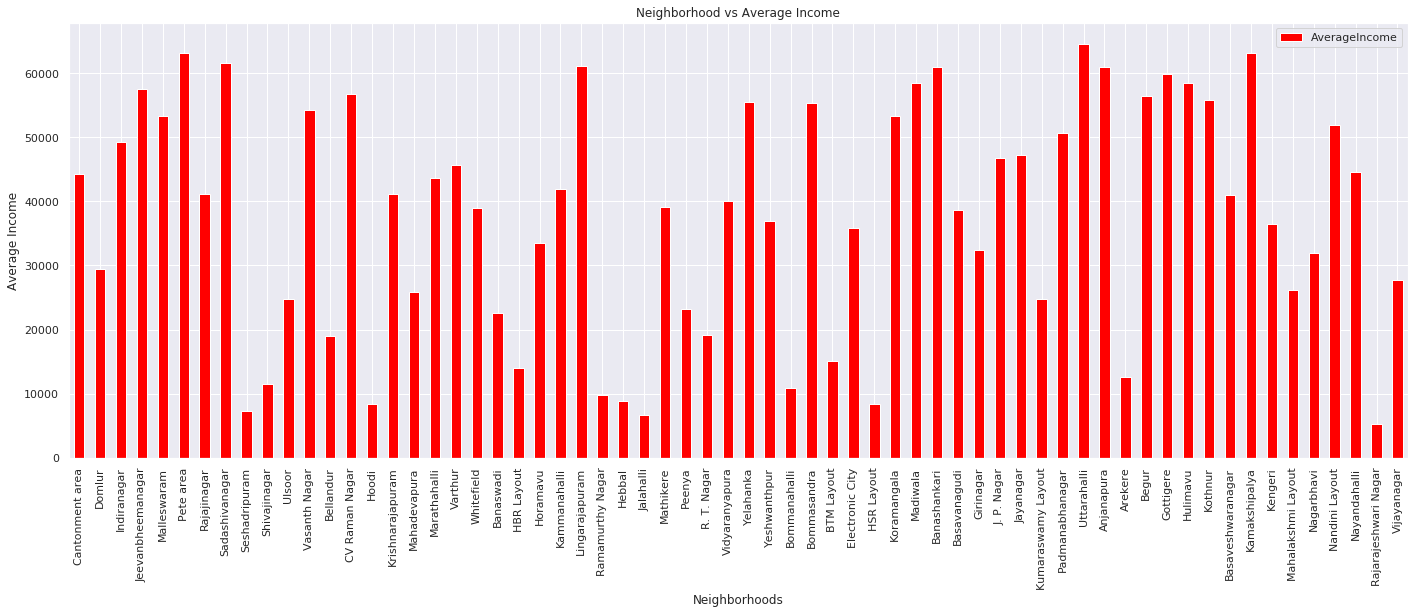

In [278]:
#color = ['red','orange','yellow','green','purple','blue','voilet','black','grey','brown']
df_grp3.plot(kind = 'bar',stacked = False,color = 'red' ,figsize=(24, 8))
plt.ylabel('Average Income')
plt.xlabel('Neighborhoods')
labels = df['Neighborhoods'].unique()
ticks = np.arange(0,64,1)
plt.xticks(ticks,labels)
plt.title('Neighborhood vs Average Income')
plt.show()

### We see how different regions have different population,average income and their distribution different areas of Bangalore. This gives us the holistic idea of the dataset. 

### Creating a Map of Bangalore 

In [279]:
#getting the co-ordinates of Bangalore
geolocator = Nominatim(user_agent = "bangalore_explorer") 
location = geolocator.geocode("Bangalore")
print(location.address) 
print("The Geographical Coordinates of Bangalore are {}, {}".format(location.latitude, location.longitude))

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
The Geographical Coordinates of Bangalore are 12.9791198, 77.5912997


In [281]:
# create map of Bangalore using latitude and longitude values
latitude = location.latitude
longitude = location.longitude
map_bangalore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighborhoods']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng]).add_to(map_bangalore)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

#### We can see the different Neighborhoods(Areas) marked covering the entire Bangalore.

### Lets now explore each Neighborhood in detail using foursquare API 

In [282]:
# The code was removed by Watson Studio for sharing.

In [283]:
df.head()

,Borough,Neighborhoods,Latitude,Longitude,Population,AverageIncome
0,Central,Cantonment area,12.972442,77.580643,866377,18944.099792
1,Central,Domlur,12.960992,77.638726,743186,56837.022198
2,Central,Indiranagar,12.971891,77.641151,474289,41991.817435
3,Central,Jeevanbheemanagar,12.962900,77.659500,527874,6667.447632
4,Central,Malleswaram,13.003100,77.564300,893629,53270.063892


In [284]:
df.iloc[0,1]

'Cantonment area'

##### So for start we will Cantonment area in Central Bangalore and see what we get.

In [188]:
neighborhood_latitude = df.iloc[0, 2] # neighborhood latitude value
neighborhood_longitude = df.iloc[0, 3] # neighborhood longitude value

neighborhood_name = df.iloc[0, 1] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))
print('Population - {} , Average Income - {} Rupees'.format(df.iloc[0,4],df.iloc[0,5]))

Latitude and longitude values of Cantonment area are 12.972442, 77.58064300000001.
Population - 866377 , Average Income - 18944.09979245654 Rupees


#### Using Foursquare API, exploring area under 1000m radius of Cantonment area

In [285]:
LIMIT = 1000
radius = 1000
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)


url

'https://api.foursquare.com/v2/venues/explore?&client_id=KM4N2DKSD15QQQ0QQ3ST5EEPPD2IVHNIVSQEPSLVZBPI25GA&client_secret=0CHY21SAUUDNMSANXACNVRL12OT3B0XYYKVLMSFXYQT3RM1B&v=20180605&ll=12.972442,77.58064300000001&radius=1000&limit=1000'

In [286]:
results = requests.get(url).json() #getting json file from the foursquare

In [287]:
results

{'meta': {'code': 200, 'requestId': '5f00836ea10064683e4c640e'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Bangalore',
  'headerFullLocation': 'Bangalore',
  'headerLocationGranularity': 'city',
  'totalResults': 28,
  'suggestedBounds': {'ne': {'lat': 12.981442009000007,
    'lng': 77.5898614775685},
   'sw': {'lat': 12.963441990999991, 'lng': 77.57142452243151}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4c13b3f082a3c9b6d5e0fbf8',
       'name': 'Hotel Fishland',
       'location': {'address': 'Sujatha Complex',
        'crossStreet': '1st Main Gandhinagar',
        'lat': 12.975568890049333,
        'lng': 77.57859164076424,
        'labeledLatLngs': [{'label': 'disp

#### Creating a function which extracts the category of the venue

In [288]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#### Loading JSON data into Pandas Dataframe

In [289]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Hotel Fishland,Seafood Restaurant,12.975569,77.578592
1,Lakshmi Nataraj Refreshments,South Indian Restaurant,12.967476,77.579468
2,Chikkana Tiffin Room,Indian Restaurant,12.968557,77.584282
3,Udupi Sri Krishna Bhavan,Indian Restaurant,12.971563,77.574158
4,Freedom Park,Park,12.978008,77.582373


In [290]:
#No of venues were returned by Foursquare
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

28 venues were returned by Foursquare.


### Let's create a function to repeat the same process to all the neighborhoods in Bangalore

In [317]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=1000):   #increasing radius to cover more areas
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        #print("Fetching venues for : ",name)            
        # create the API request URL
        LIMIT = 1000
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [320]:
bangalore_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

In [321]:
print(bangalore_venues.shape)
bangalore_venues.head()

(1670, 8)


,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Cantonment area,Central,12.972442,77.580643,Hotel Fishland,12.975569,77.578592,Seafood Restaurant
1,Cantonment area,Central,12.972442,77.580643,Lakshmi Nataraj Refreshments,12.967476,77.579468,South Indian Restaurant
2,Cantonment area,Central,12.972442,77.580643,Chikkana Tiffin Room,12.968557,77.584282,Indian Restaurant
3,Cantonment area,Central,12.972442,77.580643,Udupi Sri Krishna Bhavan,12.971563,77.574158,Indian Restaurant
4,Cantonment area,Central,12.972442,77.580643,Freedom Park,12.978008,77.582373,Park


#### This Data may contain duplicate venues as the radius of two or more neighborhoods may overlap. 

In [322]:
bangalore_venues.drop_duplicates(subset = ['Venue Latitude', 'Venue Longitude'], inplace = True) #remove duplicacy
bangalore_venues.shape

(1569, 8)

In [323]:
duplicate_rows = bangalore_venues[bangalore_venues.duplicated(['Venue', 'Venue Latitude', 'Venue Longitude'])] #checking
duplicate_rows.shape

(0, 8)

In [324]:
bangalore_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(25)

Venue Category
Indian Restaurant                293
Café                              99
Fast Food Restaurant              77
Ice Cream Shop                    55
Coffee Shop                       50
Bakery                            46
Pizza Place                       46
Department Store                  44
Chinese Restaurant                43
Hotel                             37
Vegetarian / Vegan Restaurant     29
Italian Restaurant                24
Clothing Store                    22
Snack Place                       20
Sandwich Place                    19
Pub                               18
Bus Station                       18
Lounge                            18
Juice Bar                         17
Restaurant                        16
Park                              16
Dessert Shop                      16
Asian Restaurant                  16
Breakfast Spot                    15
Gym                               15
Name: Neighborhood, dtype: int64

In [325]:
print('There are {} uniques categories.'.format(bangalore_venues['Venue Category'].nunique()))

There are 176 uniques categories.


### Neighborhood vs Number of Venues

In [326]:
individual_bangalore_venue_count = bangalore_venues.groupby(['Borough','Neighborhood'])['Venue'].count().to_frame()
individual_bangalore_venue_count.head(15)

Venue
Borough Neighborhood            
Central Cantonment area       28
        Domlur                86
        Indiranagar           80
        Jeevanbheemanagar     27
        Malleswaram           40
        Pete area             17
        Rajajinagar           21
        Sadashivanagar        30
        Seshadripuram         89
        Shivajinagar          40
        Ulsoor                18
        Vasanth Nagar         55
Eastern Bellandur             47
        CV Raman Nagar        35
        Hoodi                 12

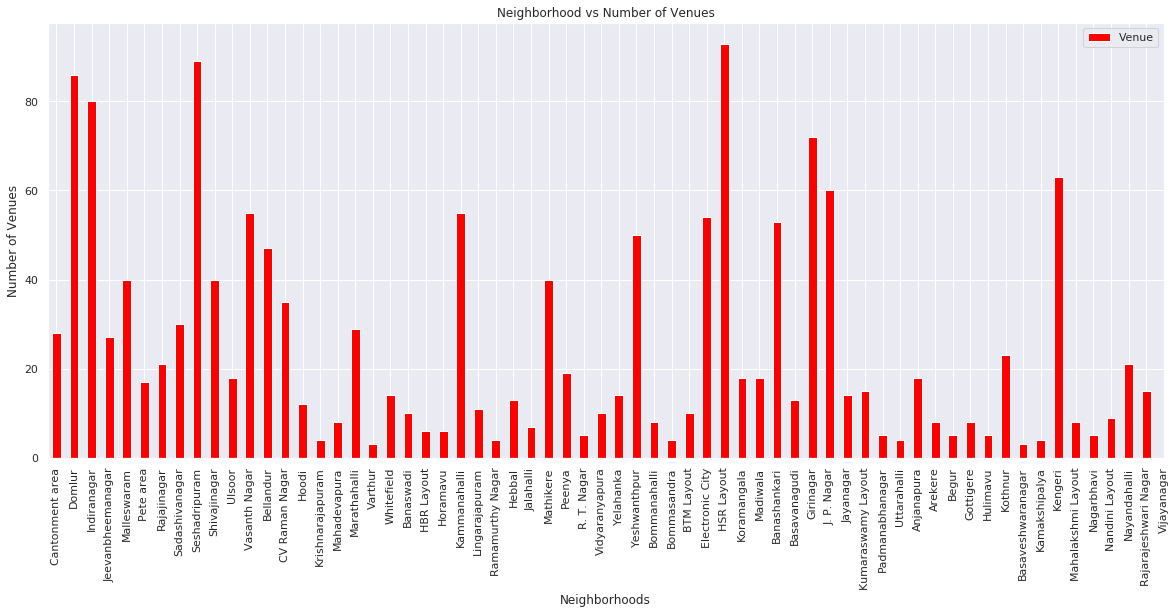

In [327]:
individual_bangalore_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)
individual_bangalore_venue_count.reset_index(inplace=True)

individual_bangalore_venue_count.plot(kind = 'bar',stacked = False,color = 'red',figsize=(20, 8))
plt.ylabel('Number of Venues')
plt.xlabel('Neighborhoods')
labels = df['Neighborhoods'].unique()
ticks = np.arange(0,64,1)
plt.xticks(ticks,labels)
plt.title('Neighborhood vs Number of Venues')
plt.show()




#import seaborn as sns
#sns.set(rc={'figure.figsize':(20,10)})
#plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_bangalore_venue_count)
#plot.set_xticklabels(individual_bangalore_venue_count['Neighborhood'],rotation=90)

#### We can see different number of venues in different neighborhoods in Bangalore. Few areas like. have relatively higher number than areas like ..

### Gyms in Bangalore

In [328]:
bangalore_gyms = bangalore_venues[bangalore_venues['Venue Category'].str.contains('Gym')]
bangalore_gyms.head(10)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
109,Domlur,Central,12.960992,77.638726,Dell 4 GYM,12.953075,77.641500,Gym
174,Indiranagar,Central,12.971891,77.641151,The Tribe Cult Fitness,12.980738,77.640515,Gym / Fitness Center
323,Sadashivanagar,Central,13.006800,77.581300,Affinity Gym,13.009358,77.579678,Gym
337,Sadashivanagar,Central,13.006800,77.581300,Fitness One,13.001221,77.577104,Gym
572,Vasanth Nagar,Central,12.991100,77.592000,Energy Fitness Centre,12.989589,77.597131,Gym / Fitness Center
599,Bellandur,Eastern,12.926000,77.676200,Sobha Lakeview Clubhouse,12.929097,77.672374,Gym
621,Bellandur,Eastern,12.926000,77.676200,Snap Fitness,12.923152,77.669660,Gym
719,Whitefield,Eastern,12.969800,77.749900,Golds Gym,12.972217,77.750529,Gym / Fitness Center
860,Mathikere,Northern,13.033400,77.564000,crunch fitness regime,13.030998,77.570374,Gym
891,Mathikere,Northern,13.033400,77.564000,international fitness centre,13.034830,77.557855,Gym


#### Gyms in Neighborhoods

In [329]:
df_gyms = bangalore_gyms[['Neighborhood','Venue']]
df_grp_gym = df_gyms.groupby(['Neighborhood'], as_index = False).count() #arranging no of neighborhoods and boroughs
df_grp_gym.head(10)

,Neighborhood,Venue
0,BTM Layout,1
1,Basaveshwaranagar,1
2,Bellandur,2
3,Domlur,1
4,HSR Layout,2
5,Indiranagar,1
6,J. P. Nagar,1
7,Koramangala,2
8,Mahalakshmi Layout,1
9,Mathikere,2


#@hidden_cell

df_grp_gym.plot(kind = 'bar',stacked = False,color = 'red',figsize=(20, 8) )
plt.ylabel('Number of gyms')
plt.xlabel('Neighborhoods')
labels = df['Neighborhoods'].unique()
ticks = np.arange(0,64,1)
plt.xticks(ticks,labels)
plt.title('Neighborhood vs Number of Venues')
plt.show()

#### Lets plot the gyms on a map

In [330]:
map_bangalore = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, venue, neighborhood in zip(bangalore_gyms['Venue Latitude'], bangalore_gyms['Venue Longitude'], bangalore_gyms['Venue'], bangalore_gyms['Neighborhood']):
    label = '{}, {}'.format(venue,neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.Marker([lat, lng]).add_to(map_bangalore)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0,
        parse_html=False).add_to(map_bangalore)  
    
map_bangalore

### Analysing Each Neighborhood

In [331]:
bangalore_onehot = pd.get_dummies(bangalore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bangalore_onehot['Neighborhood'] = bangalore_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bangalore_onehot.columns[-1]] + list(bangalore_onehot.columns[:-1])
bangalore_onehot = bangalore_onehot[fixed_columns]

bangalore_onehot.head()

,Yoga Studio,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,...,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Train Station,Tram Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [340]:
bangalore_grouped = bangalore_onehot.groupby('Neighborhood').mean().reset_index()
bangalore_grouped.head()

,Neighborhood,Yoga Studio,ATM,Accessories Store,Afghan Restaurant,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Art Museum,...,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Theater,Train Station,Tram Station,Udupi Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Women's Store
0,Anjanapura,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
1,Arekere,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
2,BTM Layout,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.08,0.0,0.0
3,Banashankari,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
4,Banaswadi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.10,0.0,0.0


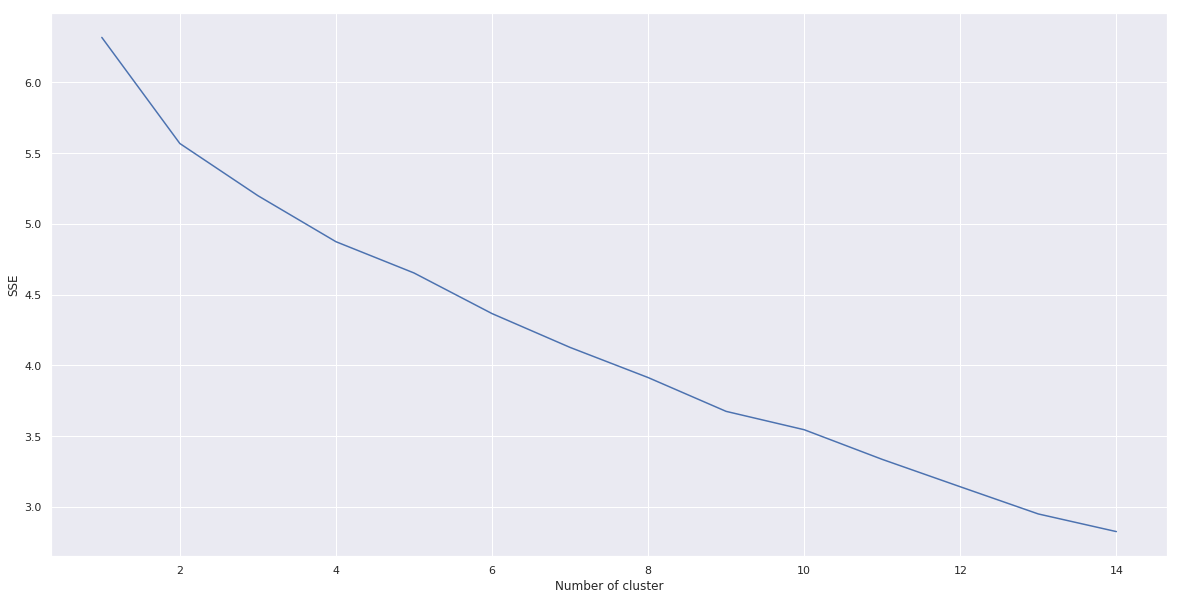

In [341]:
sse = {}
for k in range(1,15):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(bangalore_grouped.drop(columns = ['Neighborhood'],axis=1))
    bangalore_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()